In [22]:
import csv
import os
from matplotlib import pyplot as plt 
from datetime import datetime, date, timedelta
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.recurrent import LSTM
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras import metrics

In [13]:
with open('/content/sample_data/130001_tokyo_covid19_patients.csv', encoding="utf-8_sig") as f:
  reader = csv.reader(f)
  l_f = [row for row in reader]

date = l_f[1][4]
index = 0 
dateArray = [] 
infectedArray = []

dateCount = -1

for row in l_f[1:len(l_f)]: 
  rowDate = row[4]
  dateCount += 1
  if date != rowDate:
    nextDate = datetime.strptime(date, '%Y-%m-%d') + timedelta(days = 1)
    tmpDate = datetime.strptime(rowDate, '%Y-%m-%d')
    if nextDate != tmpDate:
      dateArray.append(date)
      infectedArray.append(dateCount)
      nextDateStr = ""
      while(nextDate != tmpDate):
        nextDateStr = datetime.strftime(nextDate, '%Y-%m-%d')
        dateArray.append(nextDateStr)
        infectedArray.append(0)
        nextDate = nextDate + timedelta(days = 1)
      date = datetime.strftime(nextDate, '%Y-%m-%d')
      dateCount = 0
    else:
      dateArray.append(date)
      infectedArray.append(dateCount)
      date = rowDate
      dateCount = 0

#最後の日
dateArray.append(date) 
dateCount +=1
infectedArray.append(dateCount)

In [14]:
# ログ確認
for index in range(len(dateArray)): 
  print("---------") 
  print(dateArray[index]) 
  print(infectedArray[index]) 
  print("---------")

---------
2020-01-24
1
---------
---------
2020-01-25
1
---------
---------
2020-01-26
0
---------
---------
2020-01-27
0
---------
---------
2020-01-28
0
---------
---------
2020-01-29
0
---------
---------
2020-01-30
1
---------
---------
2020-01-31
0
---------
---------
2020-02-01
0
---------
---------
2020-02-02
0
---------
---------
2020-02-03
0
---------
---------
2020-02-04
0
---------
---------
2020-02-05
0
---------
---------
2020-02-06
0
---------
---------
2020-02-07
0
---------
---------
2020-02-08
0
---------
---------
2020-02-09
0
---------
---------
2020-02-10
0
---------
---------
2020-02-11
0
---------
---------
2020-02-12
0
---------
---------
2020-02-13
1
---------
---------
2020-02-14
2
---------
---------
2020-02-15
8
---------
---------
2020-02-16
5
---------
---------
2020-02-17
0
---------
---------
2020-02-18
3
---------
---------
2020-02-19
3
---------
---------
2020-02-20
0
---------
---------
2020-02-21
3
---------
---------
2020-02-22
1
---------
---------


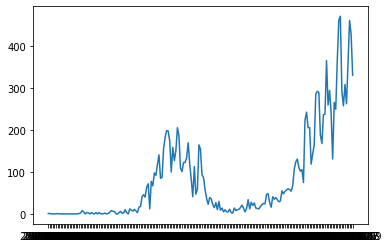

In [15]:
# 図示
plt.plot(dateArray, infectedArray)
plt.show()

In [16]:
#学習用データの生成
def create_data(data, length_per_group, dimension):
  # 学習用データ
  train = []
  # 正解データ
  target = []

  print(len(data))

  for i in range(0, len(data) - length_per_group):
    train.append(data[i:i + length_per_group])
    target.append(data[i + length_per_group])

  x = np.array(train).reshape(len(train), length_per_group, dimension)
  y = np.array(target).reshape(len(train), 1)

  return (x, y)

In [37]:
LENGTH_PER_UNIT = 7
  
X_train, Y_train = create_data(infectedArray, LENGTH_PER_UNIT, 1)

print(Y_train)

199
[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  1]
 [  2]
 [  8]
 [  5]
 [  0]
 [  3]
 [  3]
 [  0]
 [  3]
 [  1]
 [  0]
 [  3]
 [  0]
 [  3]
 [  1]
 [  0]
 [  1]
 [  2]
 [  0]
 [  1]
 [  4]
 [  8]
 [  6]
 [  6]
 [  0]
 [  0]
 [  3]
 [  6]
 [  2]
 [  2]
 [ 10]
 [  3]
 [  0]
 [ 12]
 [  9]
 [  7]
 [ 11]
 [  7]
 [  3]
 [ 16]
 [ 18]
 [ 41]
 [ 46]
 [ 40]
 [ 64]
 [ 72]
 [ 12]
 [ 78]
 [ 67]
 [ 98]
 [ 92]
 [118]
 [141]
 [ 85]
 [ 87]
 [156]
 [183]
 [199]
 [198]
 [174]
 [100]
 [159]
 [127]
 [151]
 [206]
 [186]
 [109]
 [101]
 [123]
 [123]
 [134]
 [170]
 [119]
 [ 82]
 [ 41]
 [113]
 [ 47]
 [ 59]
 [165]
 [154]
 [ 93]
 [ 87]
 [ 57]
 [ 37]
 [ 23]
 [ 39]
 [ 36]
 [ 22]
 [ 15]
 [ 27]
 [ 10]
 [ 30]
 [  9]
 [ 14]
 [  5]
 [ 10]
 [  5]
 [  5]
 [ 11]
 [  3]
 [  2]
 [ 14]
 [  8]
 [ 10]
 [ 11]
 [ 15]
 [ 21]
 [ 14]
 [  5]
 [ 13]
 [ 34]
 [ 12]
 [ 28]
 [ 20]
 [ 26]
 [ 14]
 [ 13]
 [ 12]
 [ 18]
 [ 22]
 [ 25]
 [ 24]
 [ 47]
 [ 48]
 [ 27]
 [ 16]
 [ 41]
 [ 35]
 [ 39]
 [

In [18]:
def get_model_list(input_shape):
    # 実行するモデル一覧
    model_list = [
        ['LSTM_1', Sequential([
            LSTM(100, input_shape=input_shape), 
            Dense(1), 
            Activation("linear")])], 
        ['LSTM_2', Sequential([
            LSTM(300, input_shape=input_shape), 
            Dense(1), 
            Activation("linear")])], 
    ]

    return model_list

In [40]:
model_list = get_model_list((LENGTH_PER_UNIT,1))
opt = optimizers.Adam()

for save_path, model in model_list:

  if not os.path.isdir(save_path):
    os.mkdir(save_path)

  model.summary()

  model.compile(optimizer = opt,
                loss = 'mean_squared_error',
                metrics = ['accuracy'])
  file_path = save_path + '/weights.{epoch:03d}-{loss:.2f}-{accuracy:.2f}-{val_loss:.2f}-{val_accuracy:.2f}.hdf5'
  model_ckp = ModelCheckpoint(filepath = file_path, 
                              monitor='loss',
                              verbose=1,
                              save_best_only=True,
                              mode='auto',
                              period=5)
  
  model = model.fit(X_train, Y_train,
                    epochs = 50,
                    batch_size = 10, 
                    validation_split = 0.1,
                    callbacks = [model_ckp])


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_28 (Activation)   (None, 1)                 0         
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
18/18 [==============================] - 0s 26ms/step - loss: 7646.2725 - accuracy: 0.1105 - val_loss: 105878.2969 - val_accuracy: 0.0000e+00
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 7368.0732 - accuracy: 0.0640 - val_loss: 104374.1094 - val_accuracy: 0.0000e+00
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 70

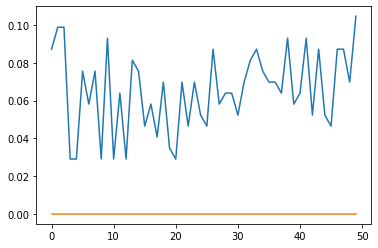

In [47]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])


